In [107]:
using LinearAlgebra, Optim, Plots, DataFrames, CSV, StatsPlots
using BenchmarkTools, Distributions, Random, Measures

In [116]:
X_gate = DataFrame(CSV.File("../../data/x_gate34.txt"))
RX_gate = DataFrame(CSV.File("../../data/rx_gate.txt"))

Row,fidelity,coefficients
,Float64,String
1,1.20507e-6,"[-0.04655796680841195, -1.2438292833378375, -0.1406460486076321, -0.14079181631807583, -0.046678942303087126, 0.27906031464822534, 1.8863479204732916, -1.2898175746932359, 0.5407841705366296, -2.590294425795943, 1.6119972951312043, 1.4608846382923544, 1.460376135629278, 1.4614619725689404, -4.821975670276195, 1.4611896647380138, 1.4573633778977233, -0.747380276689663, 0.8184810945838297, 3.2310701225570466, -4.387912831043584, -0.35720977306373897, -1.934240834005821, 3.9667236624146898, 2.40331084297529, 0.011449497626258203, -2.3956097138618038, -0.134358673458309, 1.4394809695701825, 0.03625512340061234, -1.5732717273460013, 1.6200414644408898, -2.824640509764129, 0.3334395836920966, 2.417219675660906]"
2,8.15505e-6,"[-0.09873058290370325, -0.09690667491339451, -0.03679773341134153, -0.4906243753589451, 0.17300410660395318, 3.216377297936684, -1.3712575088485013, 2.0610812214446965, 3.038562835329238, 0.6519639308060302, -0.8616456945786094, 0.8471152484212656, 0.6716950373804182, -1.24034112510092, 3.809046750687828, 1.3920895970594447, 3.7203388524035224, 0.8591267581919335, -1.7714872306990788, 1.9173289208648658, 0.6118721893852194, 4.4041757752827, -3.2670839137082077, 2.3356728446053907, 2.6626092669321375, 2.9994922758310025, -3.001194658959084, -2.6794334523275025, -2.2916022059065995, 3.2488190789986304, -2.2485962558785304, -1.505842550594644, -0.23431099833674032, 0.5151517403624025, 1.2532574306133621]"
3,1.15726e-6,"[-0.0002540585026476328, 0.059226469189171425, -0.05919561815586493, -0.05970134121021452, -0.00015954853798958766, 2.6242808767190433, 3.468570344610044, 0.6292876729801703, 4.6329029667086274, -3.412835772295953, -1.314389144790783, 0.08868211752853898, 0.08055068932201265, 0.069459487538915, 4.608445356682769, -1.668420540187266, -1.656125071700939, -0.06137543669294201, -1.0869564032653205, -1.7852384815764033, 2.3022004650897667, 1.0164149964912803, -0.001099822373791362, 3.9416583246364154, -1.334225148806721, -0.661758288055215, -2.9869898324119917, 4.570667663167993, -0.6914464531714899, -2.1148245762820483, 3.350566284503238, -0.05639061057853675, 2.204511028051785, -2.311001123266547, 1.8587612490786607]"
4,0.000215293,"[0.27196970356879696, -0.29074064305079284, -0.9982549435355931, -0.9865772767460822, -0.991322072350017, 1.064313141459096, 0.9747347214803145, 0.851153693490239, 1.1591981351697915, 1.069453836972002, 0.9642033662518564, 3.481992182514418, -2.628019005230769, -2.4310205068304382, -2.6870253568051483, 3.7378660504153136, -2.6239898250421985, 1.1399938675586805, 2.861750813727246, 4.2537653826659705, -2.772802645838739, -1.6495584350190355, -0.7833229064951271, 0.03248676602825607, 0.7624937055684112, -2.459299066709876, 5.145417304341611, 0.09257850824588998, 0.045435053436161804, -2.946609458982109, 0.8005062124600599, 2.5498705332965623, -4.367130568277638, -0.47055691156939894, -1.4366013509533955]"
5,5.9877e-5,"[1.1109633544887438, -0.805462634248983, -0.1002126567329486, 1.108286206792129, -0.7953456756599302, 1.8785787968082548, 2.205803075234327, -4.216909582940494, -1.1674678432045427, 1.9046893868336596, -0.6823072618617221, 1.2838253308073837, 1.4219894514504485, -4.875712385374386, 1.395958006772547, -2.0862681440184176, 1.365346745282141, 0.2790205361055302, 0.5138008564978472, 0.4555427511941626, 0.17743307457680735, 0.3861418598548805, 0.34159664137941465, -2.001141455697675, 4.021608988009034, -2.004052210033365, 1.1176761293928186, -1.9181876507213094, 0.8257821898734052, -2.5948902957497197, -2.311157936373596, 3.7431793491432876, 3.9179433611532364, 0.8803386223959255, -2.6368595422465892]"
6,0.000994585,"[1.4405637781177227, 1.3457255469072524, 1.393051863622358, 1.5383354144345827, -1.599167909836446, -2.6227590347508714, 3.5935449335788987, -0.23216076192764581, 0.1959683225015755, -0.25553433059115327, -4.829279473948677, 1.4802417805727048, 2.175880073968299, -1.0717015489325425, -2.220383287820

# Changing the data because I saved them wrongly

In [109]:
RX_NEW = DataFrame(fidelity=[], coefficients=[])

for i in 1:length(RX_gate.coefficients)
    RX_gate.coefficients[i]=replace.(RX_gate.coefficients[i], [','] => "")
    push!(RX_NEW.coefficients,[parse(Float64, ss) for ss in split(RX_gate.coefficients[i][2:end-1])])
    push!(RX_NEW.fidelity, RX_gate.fidelity[i])
end

X_NEW = DataFrame(fidelity=[], coefficients=[])

for i in 1:length(RX_gate.coefficients)
    X_gate.coefficients[i]=replace.(X_gate.coefficients[i], [','] => "")
    push!(X_NEW.coefficients,[parse(Float64, ss) for ss in split(X_gate.coefficients[i][2:end-1])])
    push!(X_NEW.fidelity, X_gate.fidelity[i])
end


In [110]:
RX_fidelities = []
for fidelity in RX_NEW.fidelity
    if fidelity < 1e-5
        push!(RX_fidelities,fidelity)
    end
end

X_fidelities = []
for fidelity in X_NEW.fidelity
    if fidelity < 1e-5
        push!(X_fidelities,fidelity)
    end
end

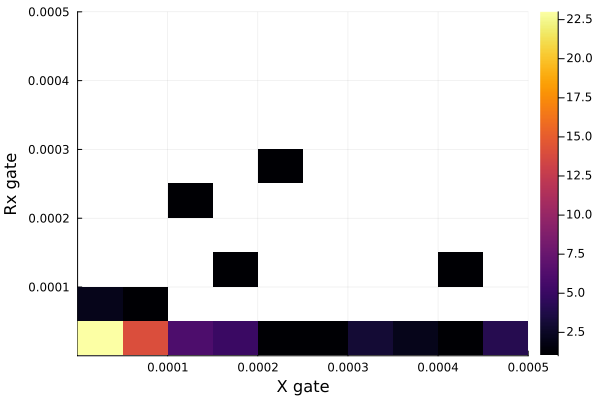

In [111]:
histogram2d(X_NEW.fidelity, RX_NEW.fidelity, bins = (0:5*1e-5:5*1e-4, 0:5*1e-5:5*1e-4))
xlabel!("X gate")
ylabel!("Rx gate")

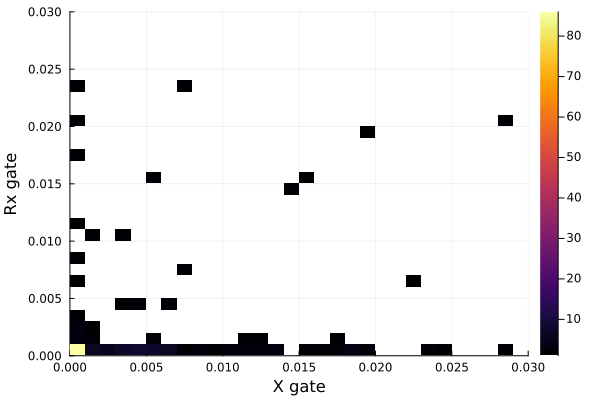

In [112]:
histogram2d(X_NEW.fidelity, RX_NEW.fidelity, bins = (0:1e-3:3*1e-2, 0:1e-3:3*1e-2))
xlabel!("X gate")
ylabel!("Rx gate")

In [113]:
to_delete_x = []
to_delete_rx = []

for i in 1:length(X_NEW.fidelity)
    if X_NEW.fidelity[i] > 1e-4
        push!(to_delete_x, i)
    end
    if RX_NEW.fidelity[i] > 1e-5
        push!(to_delete_rx, i)
    end
end

println(length(to_delete_x))

delete!(X_NEW, to_delete_x)
delete!(RX_NEW, to_delete_rx)

RX_NEW


X_NEW

147


Row,fidelity,coefficients
,Any,Any
1,6.32645e-5,"[0.182745, 0.176448, 0.464224, 0.189159, 0.00798168, -0.483773, 4.1768, -3.15458, 0.699464, -2.27306 … 1.28416, 1.46232, 4.11084, 0.0323069, -2.27975, -1.05428, 0.893616, 0.777561, -0.355158, -3.92672]"
2,3.96726e-5,"[-0.00714285, -0.186592, -0.188416, -0.488888, -0.186204, 2.3051, -2.77427, -4.64829, 1.77925, 3.11033 … 0.304993, 2.99547, -4.142, 1.41067, 0.788434, 3.69505, 0.101644, 0.757962, -2.85994, 0.0121946]"
3,6.96932e-5,"[0.15401, -0.636811, -0.0886625, 0.203962, 0.0668415, 1.07804, 1.42632, 1.4082, -1.0016, -0.664934 … 0.639226, 3.05272, -3.23506, 2.57261, 4.57623, -0.688009, 0.719668, 1.5133, -1.2148, -0.303275]"
4,4.51218e-6,"[0.29192, -0.211861, 0.299746, -0.225389, 0.28571, -0.700243, -2.61704, -2.78101, -1.89469, 0.216988 … 1.73247, -0.830886, 2.54597, 3.28316, 1.20294, 3.00425, 3.33755, 3.48815, -1.26353, -1.36218]"
5,1.41254e-5,"[-0.803341, 0.228378, -0.148632, -0.417238, -0.155913, -2.9374, 3.43891, -2.82844, 3.5261, -2.69768 … -2.63262, -0.544132, 0.479019, 0.223771, 1.53439, -1.05701, 1.47873, 1.32776, -2.01965, 1.03084]"
6,7.98046e-5,"[0.190501, -0.0899017, -0.0966731, 0.187754, 0.00103476, -2.92241, 3.54403, -2.20582, 0.643183, 1.11601 … -2.84505, 0.278056, 0.741788, 1.71994, 0.123654, -0.97031, -2.80468, 3.27964, -1.77057, 1.53232]"
7,4.64966e-6,"[-0.0977085, 0.111256, -0.0763026, 0.0989354, -0.0905026, 3.60136, 1.58966, 0.623472, -2.03054, -2.14797 … -0.326949, -3.63444, 2.63934, 2.56459, -0.0706415, -4.26307, -2.99681, 0.275749, 0.138447, -0.586624]"
8,1.66526e-5,"[-0.0744403, 0.0289347, -0.139785, -0.37072, -0.144514, 1.18827, 1.41052, -0.715351, 2.86801, 2.65371 … -1.39139, -4.16207, -3.22884, -1.46913, 1.5171, 4.85462, -3.89891, 2.10047, -0.658386, -2.84773]"
9,2.59234e-5,"[0.0146569, 0.192305, 0.488862, 0.203739, 0.1946, -1.26998, 3.51617, 2.01127, -4.68805, 3.46254 … -0.962939, 3.28863, 3.78946, -3.08826, -0.63235, 2.89131, 0.735619, 2.07885, -1.02738, 2.96277]"
